# Udacity CarND Capstone Project - Traffic Light Detection & Classification
# Load Highway Camera Images

In [1]:
#import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time
import glob

red = glob.glob("data/highway/0-Red/*.*")
yellow = glob.glob("data/highway/1-Yellow/*.*")
green = glob.glob("data/highway/2-Green/*.*")
unknown = glob.glob("data/highway/3-Unknown/*.*")

print(len(red), 'Red traffic light images')
print(len(yellow), 'Yellow traffic light images')
print(len(green), 'Green traffic light images')
print(len(unknown), 'Non-raffic light images')
example_img = mpimg.imread(green[60])
print(example_img.shape, 'image shape')


755 Red traffic light images
110 Yellow traffic light images
357 Green traffic light images
1524 Non-raffic light images
(600, 800, 3) image shape


# Use pre-trained VGG-16 inference to look for Traffic Light

In [2]:
import keras
import numpy as np
from keras.applications import vgg16
#Load the VGG16 model
vgg_model = vgg16.VGG16(weights='imagenet')

Using TensorFlow backend.


PIL image size =  (224, 224)
NumPy image size =  (224, 224, 3)
Input image size =  (1, 224, 224, 3)
label_vgg16 =  ('n06874185', 'traffic_light', 0.99999058)


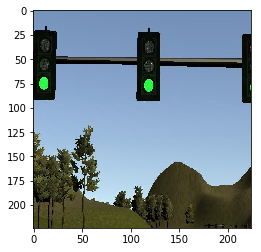

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

%matplotlib inline

# load an image in PIL format
original_image = load_img(green[0], target_size=(224, 224))

# convert the PIL image (width, height) to a NumPy array (height, width, channel)
#image = cv2.resize(example_img, (224, 224))
numpy_image = img_to_array(original_image)

# Convert the image into 4D Tensor (samples, height, width, channels) by adding an extra dimension to the axis 0.
input_image = np.expand_dims(numpy_image, axis=0)

print('PIL image size = ', original_image.size)
print('NumPy image size = ', numpy_image.shape)
print('Input image size = ', input_image.shape)
#plot tensor
plt.imshow(np.uint8(input_image[0]))

#preprocess for vgg16
processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())

# vgg16
predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
label_vgg16 = decode_predictions(predictions_vgg16)
print ('label_vgg16 = ', label_vgg16[0][0])

In [4]:
from random import shuffle

shuffle(red)
shuffle(yellow)
shuffle(green)
shuffle(unknown)



In [ ]:
# initialize the data and labels
print("[INFO] loading images for classifer training...")
data = []
labels = []

# loop over the red images
for imagePath in red:
    # load the image, pre-process it, and store it in the data list
    print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 1 
        data.append(processed_image_vgg16)
        #data.append(image)
        labels.append(label)


# loop over the yellow images
for imagePath in yellow:
    # load the image, pre-process it, and store it in the data list
    print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 1 
        data.append(processed_image_vgg16)
        #data.append(image)
        labels.append(label)

# loop over the green images
for imagePath in green:
    # load the image, pre-process it, and store it in the data list
    print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 2 
        data.append(processed_image_vgg16)
        #data.append(image)
        labels.append(label)
        
        

[INFO] loading images for classifer training...
   processing data/highway/0-Red/181118110810365243.jpg
   processing data/highway/0-Red/181118110846510790.jpg
   processing data/highway/0-Red/181118111012381568.jpg
   processing data/highway/0-Red/181118110822341574.jpg
   processing data/highway/0-Red/181118110848030782.jpg
   processing data/highway/0-Red/181118110902015669.jpg
   processing data/highway/0-Red/181118110851716500.jpg
   processing data/highway/0-Red/181118110816358899.jpg
   processing data/highway/0-Red/181118110901342235.jpg
   processing data/highway/0-Red/181118110810131671.jpg
   processing data/highway/0-Red/181118111013599548.jpg
   processing data/highway/0-Red/181118111007776023.jpg
   processing data/highway/0-Red/181118110852526687.jpg
   processing data/highway/0-Red/181118111018087034.jpg
   processing data/highway/0-Red/181118110856413624.jpg
   processing data/highway/0-Red/181118110904734213.jpg
   processing data/highway/0-Red/181118111055606661.jpg


In [ ]:
print ('data', len(data))
print ('labels', len(labels))

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# convert to array
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float")/255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=9876543)

# convert the labels from integers to one-hot encoding
#trainY = to_categorical(trainY, num_classes=2)
#testY = to_categorical(testY, num_classes=2)

print ('trainX ', trainX.shape)
print ('trainY ', trainY.shape)
print ('testX ', testX.shape)
print ('testY ', testY.shape)
       

# Visualise the training data

In [ ]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import numpy as np
from random import randint

# create Pandas dataframe for analysis of labels
import pandas as pd
trainset=pd.Series(trainY)
n_classes = len(trainset.unique())

# show distribution of training data

#trainset.value_counts().plot.bar()
plt.hist(trainY, n_classes)
plt.title("Training set class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print (trainset.describe())

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = randint(0, len(trainX))
    image = trainX[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(trainY[index])
plt.show()


# Train Classifier Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout
from keras.layers.convolutional import Convolution2D, Cropping2D

keep_prob = 0.2

model = Sequential()

model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(224, 224, 3)))

#crop 70 from top and 20 from bottom
model.add(Cropping2D(cropping=((70, 20), (0, 0))))

model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Dropout(keep_prob))

model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, validation_data = (testX, testY), nb_epoch=20)

In [ ]:
model.save('highway_model.h5')
model.summary()